# Heterogeneities

In this notebook, we will investigate the effect of inhomogeneous parameter distributions and the appropriate numerical implementation. We will first start with a simple 1-D example and compare it to an analytical solution before implementing a more complex 2-D case.

In [5]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.rcParams['figure.figsize'] = [10., 7.]
plt.rcParams['font.size'] = 16

In [7]:
%matplotlib inline

## A simple 1-D scenario

Consider first a simple steady-state 1-D scenario with three different material domains. This example could represent the temperature field along a vertical profile in the Earth for a purely conductive case, or the steady-state hydraulic head along a "1-D"-like profile of groundwater flow through different materials.

Recall that the differential equation for the inhomogeneous 1-D case is:

$$\frac{\partial}{\partial x}\left[ K_x \frac{\partial u}{\partial x}  \right] = 0$$

We also discussed the FD-discretisation of this differential equation which leads us to equations of the form:

$$\frac{K_{x,i+\frac{1}{2}} \left( u_{i+1} - u_i \right) - K_{x,i-\frac{1}{2}} \left( u_{i} - u_{i-1} \right)}{\Delta x^2}= 0 $$

We will use an iterative method to solve this problem. So, a first step is for you to derive the iterative equation.

**Your task**: Solve the previous equation for $u_i$:

$$u_i = \frac{K_{x,i+\frac{1}{2}} u_{i+1} + K_{x,i-\frac{1}{2}} u_{i-1}}{K_{x,i+\frac{1}{2}} + K_{x,i-\frac{1}{2}}}   $$

With this equation, all you need to do is to re-write your previous program in a form that can now consider the different conductivities. The simplest possibility is to write an explicit loop (e.g. in the form of a Gauss-Seidel method), but it is also possible to write the algorithm in a vectorised form (a little bit more complicated, but the elegant and efficient way). 

**Your task**: re-write your code to consider heterogeneities (stored in an array):

In [8]:
# your code here:

# for example, we now need an array for u and for K:
n=10
u = np.empty(n)
K = np.empty(n)

print u
print K

[  3.19226525e-316   3.19227355e-316   3.19231505e-316   3.19232059e-316
   3.19232335e-316   3.19232612e-316   3.19232889e-316   3.19227632e-316
   3.19233165e-316   3.19233442e-316]
[  3.10353770e+169   4.77093667e+180   1.67494803e+243   3.68777421e+180
   2.02690346e+267   4.95263388e+223   8.75004334e+183   6.01099966e+175
   2.13762514e-259   2.16194265e-313]


Finally, apply your code to solve the following problem: consider a 1-D domain with an extent and discretisation of

$$L = 300 m, \Delta x = 10 m$$ 

The domain is separated into three equal parts with conductivities:

$$K_1 = 2.0, K_2 = 6.0, K_3 = 2.0$$

Finally, we will model the system with Dirichlet boundary conditions of

$$b_0 = 10, b_1 = 20$$

**Your task**: Solve this problem!

In [9]:
# Your code here:
n = 10
L = 300
dx = n
K_1 = 2
K_2 = 6
K_3 = 2
b0 = 10
b1 = 20
max_iter = 10000
epsilon_tol = 0.000001


In [10]:
sp1 = n/3
sp2 = 2*n/3
K[:sp1] = K_1
K[sp1:sp2] = K_2
K[:sp2] = K_3
print K

[  2.00000000e+000   2.00000000e+000   2.00000000e+000   2.00000000e+000
   2.00000000e+000   2.00000000e+000   8.75004334e+183   6.01099966e+175
   2.13762514e-259   2.16194265e-313]


In [11]:
# First step as before: define the function for a single iteration:

def gauss_seidel_iter_inhomo(u, q, dx, K):
    """Function to perform the Gauss-Seidel iteration for all values in the array u
    
    u = 1-D np.array with values of previous iteration
    q = 1-D np.array with source/sink terms (not required for Laplace solution!)
    dx = float : node spacing (not required for Laplace solution!)
    K = array of conductivities
    """
    
    # your code here
    
    # Note: copy of u not required (as we operate always on updated array!)
    
    for i in range(1,len(u)-1):   
     
        K_m = 2 * (K[i-1] * K[i]) / (K[i-1] + K[i])
        K_p = 2 * (K[i+1] * K[i]) / (K[i+1] + K[i])
        u[i] = (K_p*u[i+1] + K_m*u[i-1]) / (K_p + K_m)
        
    return u
   
    

In [17]:
# Second step as before: write the loop to perform iterations until convergence is met:
def solve_gs_inhomo(b0,b1,dx,max_iter,epsilon_tol):
    # initialize u with all ones
    n = 300
    L = 300
    dx = L/n
    K_1 = 2
    K_2 = 6
    K_3 = 2
    b0 = 10
    b1 = 20
    max_iter = 10000
    epsilon_tol = 0.000001
    u = np.empty((n))
    K = np.empty((n))
    # Set boundary conditions b0 and b1 at beginning and end of u
    u[0] = b0
    u[-1] = b1
    
    # set parameters
    sp1 = n/3
    sp2 = 2*n/3
    K[:sp1] = K_1
    K[sp1:sp2] = K_2
    K[:sp2] = K_3
   
    # no sources / sinks, so set q to 0
    q = np.zeros(dx)
    
        
    # do a for loop for jacobi iterations
    for iter in range(max_iter):

        u_previous = u.copy()
        u_current = gauss_seidel_iter_inhomo(u, q, dx, K)
        epsilon = np.sqrt(np.sum((u - u_previous)**2))
        if epsilon < epsilon_tol:
            break
        
    return u, iter


Now, create a plot of the results:

[ 10.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  

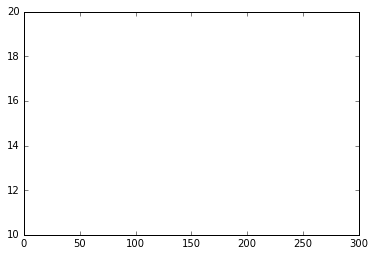

In [19]:
# Your code here:

u, iter = solve_gs_inhomo(b0,b1,dx,max_iter,epsilon_tol)
print u

plt.plot(u)

## Compare to analytical solution

Compare your numerical result now to the analytical solution for this problem.

Hint:

1. Consider flux equations in three "domains"
2. Recall overall balance and apply to flux equations
3. Set up system of equations and solve

To simplify the derivation of these equations, assume that the domain size is equal (as in the example above: three equally partitioned domains).

**Your task**: derive the analytical solution for the problem described above and compare your numerical result to it (for example in a plot):

In [14]:
# Your code here:


What do you observe? In the case of a mismatch: what is a likely explanation and how could you fix it?

## Extension to 2-D

Extend your implementation now to a 2-D problem. You can use the same problem dimension and settings as in assignment 3, and add a region with a different conductivity into the central part of the domain (e.g. from 40 to 60 in x-direction, and from 25 to 35 in y-direction, if you consider the problem of assignment 3).

**Your task**: extend your previous code to enable the calculation with inhomoegenous fields :

In [15]:
# Your code here:



Finally, a good way to represent flows in 2-D (or 3-D) is to use vector plots to represent the flux vectors. The issue now is, of course, how these vectors can be calculated, as they are not directly a part of the solution (they are so-called "derived quantities" in this sense). 

One possibility to obtain an estimate of the flux vector at each node point is to take the  average of fluxes over the boundaries in each axis direction. So, for example, to determine the flux component at location $i$ in x-direction, we can approximate:

$$q_{x,i} = \frac{1}{2} \left(q_{x, i+\frac{1}{2}} + q_{x, i-\frac{1}{2}} \right)$$

and the flux components over the boundaries are, for example:

$$ q_{x, i+\frac{1}{2}} = - K_{x, i+\frac{1}{2}} \frac{u_{i+1} - u_{i}}{\Delta x} $$

For the representation of the vector field, you can use the matplotlib function:

`plt.quiver`

**Your task**: write a function to estimate the flux vectors from your previous solution and plot the vector field for the inhomogeneous domain:

In [16]:
# your code here:

